<a href="https://colab.research.google.com/github/Sadiksha08/FDS-Lab-Work/blob/main/FDS_LAB_Practical_2_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descriptive Statistics**

* Descriptive Statistics - A descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.
* Why is Descriptive Statistics important? - Descriptive statistics are very important because if we simply presented our raw data it would be hard to visualize what the data was showing, especially if there was a lot of it. Descriptive statistics therefore enables us to present the data in a more meaningful way, which allows simpler interpretation of the data. For example, if we had the results of 100 pieces of students' coursework, we may be interested in the overall performance of those students. We would also be interested in the distribution or spread of the marks. Descriptive statistics allow us to do this.
* Role of Descriptive Statistics in Machine learning - Descriptive Statistical Analysis helps you to understand your data and is a very important part of Machine Learning. This is due to Machine Learning being all about making predictions. On the other hand, statistics is all about drawing conclusions from data, which is a necessary initial step.





---

---

---


#Dataset Example - 1


---




In [4]:
# importing required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis


In [2]:
pd.set_option("display.max_columns",None)  # to display all the columns
pd.options.display.float_format = "{:,.2f}".format # to display float value upto two decimals

Format : A data frame with 53940 rows and 10 variables

Description : A dataset containing the prices and other attributes of almost 54,000 diamonds.

The variables are as follows:

*   price:  price in US dollars (\$326--\$18,823)
*   carat: weight of the diamond (0.2--5.01)
*   cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   colour: diamond colour, from J (worst) to D (best)
*   clarity: a measurement of how clear the diamond is (IF (best), VVS1, VVS2,VS1, VS2, SI1, SI2, I1 (worst) )
*   popularity: popularity of this specs (Good, Fair, Poor)
*   x: length in mm (0--10.74)
*   y: width in mm (0--58.9)
*   z: depth in mm (0--31.8)
*   depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
*   table: width of top of diamond relative to widest point (43--95)














In [5]:
# reading data from csv file 
xls = pd.read_csv('drive/MyDrive/datasets/diamonds.csv')

FileNotFoundError: ignored

Measures of Central Tendency
* Mean - The sum of a collection of numbers divided by the count of numbers in the collection.
* Median - The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution.
* Mode - The mode is the value that appears most often in a set of data values.

In [3]:
des_df = xls.drop(['id'],axis = 1) # drop id column
for col in des_df:   # drop all alpha-numeric columns
  if des_df[col].dtype == 'object':
    des_df = des_df.drop([col], axis = 1)

des_r = des_df.describe() # describe() gives us mean,min,max,median,1Q,3Q,std
des_r = des_r.rename(index={'50%':'median/50%'}) 

NameError: ignored

Measures of Dispersion
* Standard Deviation - The standard deviation is a measure of the amount of variation or dispersion of a set of values.
* Variance - The term variance refers to a statistical measurement of the spread between numbers in a data set.
* Min and Max Variables
  * Min is the minimum value in the column or in dataset.
  * Max is the maximum value in the column or in dataset.

Quartiles -  A quartile is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size.
* 25% or 1st quartile - The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
* 50% or 2nd quartile - The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
* 75% or 3rd quartile - The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.

In [ ]:
var_r = des_df.var() # calulating variance seperately

varlist = []
for col in des_df.columns: # converting result of var() from series to list
  if df[col].dtype == 'object':
    continue
  varlist.append(round(df[col],5))

df = pd.DataFrame([varlist],columns=des_r.columns, index=['var']) # putting results of variance into dataframe
mct = des_r.append(df) # adding var to describe result

In [ ]:
mode_r = des_df.mode() # calculating mode seperately
mode_r = mode_r.rename(index={0:'mode'}) # renaming index
mct_m = mct.append(mode_r) # adding mode to describe result

Skewness and Kurtosis
* Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
* Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

In [ ]:
skew_r = skew(des_df) # skewness resultant list
df = pd.DataFrame([skew_r],columns=des_df.columns, index=['skewness']) # converting list to dataframe
mct_s = mct_m.append(df) # adding skewness to describe dataframe

kur_r = kurtosis(des_df) # kurtosis resultant list
df = pd.DataFrame([kur_r],columns=des_df.columns, index=['kurtosis']) # converting list to dataframe
mct_k = mct_s.append(df) # adding kurtosis to describe dataframe

Range - It is difference between largest and smallest value.

In [ ]:
r_list = []
for col in des_df.columns.to_list(): # calculating range for all columns
  r_list.append(des_df[col].max()-des_df[col].min())

df = pd.DataFrame([r_list],columns=des_df.columns, index=['range']) # converting range list to dataframe
mct_r = mct_k.append(df) # adding range to describe dataframe

In [ ]:
print(mct_r) # print final dataframe

               carat     depth     table         price         x         y  \
count      53,938.00 53,940.00 53,940.00     53,936.00 53,940.00 53,940.00   
mean            0.80     61.75     57.46      3,932.83      5.73      5.73   
std             0.47      1.43      2.23      3,989.44      1.12      1.14   
min             0.20     43.00     43.00        326.00      0.00      0.00   
25%             0.40     61.00     56.00        950.00      4.71      4.72   
median/50%      0.70     61.80     57.00      2,401.00      5.70      5.71   
75%             1.04     62.50     59.00      5,324.25      6.54      6.54   
max             5.01     79.00     95.00     18,823.00     10.74     58.90   
var             0.22      2.05      4.99 15,915,659.88      1.26      1.30   
mode            0.30     62.00     56.00        605.00      4.37      4.34   
skewness         nan     -0.08      0.80           nan      0.38      2.43   
kurtosis         nan      5.74      2.80           nan     -0.62

Box Plots - A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.
* Lowest observation
* Highest observation
* Lower Quartile
* Upper Quartile
* Median

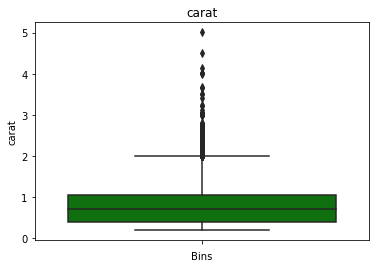

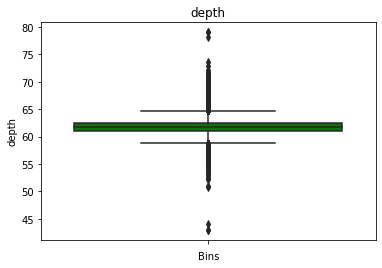

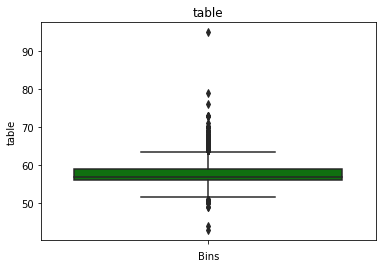

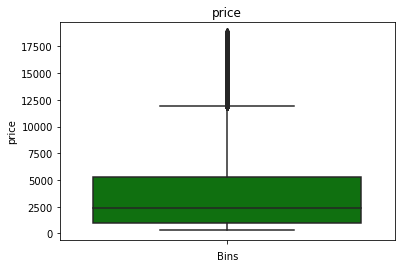

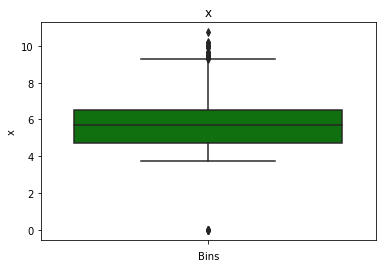

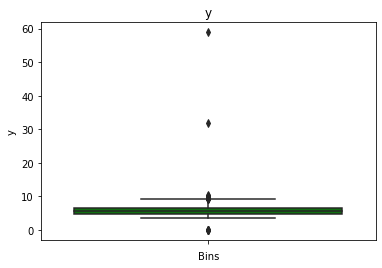

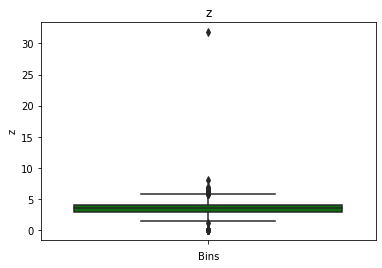

In [ ]:
# plotting boxplots
colNames = xls.columns.tolist() # make a list of columns present in dataframes
for colName in colNames:
    if xls[colName].dtype == "object" or colName == 'id': # skip Id and string columns
        continue
    plt.figure()
    sns.boxplot(y=xls[colName], color='g') # plot the boxplot
    plt.title(colName) # provide title
    plt.ylabel(colName) # name Y axis
    plt.xlabel('Bins') # name X axis
    plt.show()



---

---

---











#Dataset Example - 2


---





**Importing Libraries**

    * Pandas for reading data file
    * Numpy for performing statistical calculations
    * Matplotlib and seaborn for visualization
    * Scipy.stats for Skewness and Kurtosis





In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew
from scipy.stats import kurtosis

***To see all the columns which are present in the dataset***

In [ ]:
pd.set_option("display.max_columns",None)#To see all the columns which are present in the dataset

***#Mounting Google Drive***

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


***Unzip the dataset.zip.***

In [ ]:
!unzip /content/gdrive/MyDrive/dataset.zip


Archive:  /content/gdrive/MyDrive/dataset.zip
replace dataset.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset.xlsx            



**Reading dataset**

    df is dataframe .
    pd.read_excel reads the excel file.
    head Function prints the first five rows of the dataset. *italicized text*

**Description of data**

    Data belongs to student category which contains fname , age and gender column.
    Fname contins the name of students, age column contains the age of the students and grade column contains the marks obtained. *italicized text*



In [ ]:
df=pd.read_excel('/content/gdrive/MyDrive/dataset.xlsx')
df.head()

,name,age,grade
0,satish,22,90
1,ashish,21,70
2,vishal,22,69
3,manisha,22,45
4,neha,20,50



**Measures of Central Tendency**

    Mean
        The sum of a collection of numbers divided by the count of numbers in the collection.
  
    Median
        The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution.
   
    Mode
        The mode is the value that appears most often in a set of data values.


**Where the measures of central tendency used?**

    The above three values are used in handling null and outlier values in Machine learning, in Image processing mean and median plays an important role , we use mean and median for applying threshold values on the particular image.
    cv2.ADAPTIVE_THRESH_MEAN_C threshold value is the mean of neighbourhood area.

    cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value.



In [ ]:
df_mean=df.mean()
print("*Mean of columns age and grade*")
print(df_mean)
df_median=df.median()
print("*Median of columns age and grade*")
print(df_median)
df_mode=df.mode()
print("*Mode of columns age and grade*")
print(df_mode)

*Mean of columns age and grade*
age      21.4
grade    64.8
dtype: float64
*Median of columns age and grade*
age      22.0
grade    69.0
dtype: float64
*Mode of columns age and grade*
      name   age  grade
0   ashish  22.0     45
1  manisha   NaN     50
2     neha   NaN     69
3   satish   NaN     70
4   vishal   NaN     90



**Measures of Variability**

    Standard Deviation
       The standard deviation is a measure of the amount of variation or dispersion of a set of values.
    
    Variance
        The term variance refers to a statistical measurement of the spread between numbers in a data set.
   
    Min and Max Variables
        Min is the minimum value in the column or in dataset.
        Max is the maximum value in the column or in dataset.

**Where the measures of variability is used?**

    Standard deviation is used to know how data is spread so we can find some good insigths from it.
    Example:-

        If we are working with data which consist column of years, tax rate, sales amount etc. so, after applying standard deviation we will get to know at which year the tax rate or sales amount was more or less.
        
    Min and Max both are used to find range of the array or particilar column, so we can detect the outliers.



In [ ]:
print("Standard deviation of columns age and grade")
print(df.std())
print("Variance of columns age and grade  ")
print(df.var())
print("The Minimum value are" )
print(df.min())
print("The Maximum value are" )
print(df.max())

Standard deviation of columns age and grade
age       0.894427
grade    17.963853
dtype: float64
Variance of columns age and grade  
age        0.8
grade    322.7
dtype: float64
The Minimum value are
name     ashish
age          20
grade        45
dtype: object
The Maximum value are
name     vishal
age          22
grade        90
dtype: object




    Skewness and Kurtosis

        Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
        Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

**Where do we use Skewness and Kurtosis ?**

    Skewness can be used to obtain approximate probabilities and quantiles of distributions (such as value at risk in finance) via the Cornish-Fisher expansion.
    
    Kurtosis is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution . High kurtosis in a data set is an indicator that data has heavy tails or outliers.



In [ ]:
age_skew=skew(df["age"])
grade_skew=skew(df["grade"])
print("The skewness of column age is : ",age_skew)
print("The skewness of column grade is : ",grade_skew)

The skewness of column age is :  -0.8437499999999949
The skewness of column grade is :  0.2513781993344489


In [ ]:


age_kurtosis=kurtosis(df["age"])
print("The kurtosis of column age is ",age_kurtosis)
grade_kurtosis=kurtosis(df["grade"])
print("The kurtosis of column grade is ",grade_kurtosis)



The kurtosis of column age is  -0.9218750000000062
The kurtosis of column grade is  -1.181476183530098



 * Range
        The Range is the difference between the lowest and highest values.

    Given that the range can easily be computed with information on the maximum and minimum value of the data set.

    Users requiring only a rough indication of the data may prefer to use this indicator over more sophisticated measures of spread.



In [ ]:
age_range=(df["age"].max())-(df["age"].min())
print("The range of column age is :",age_range)

The range of column age is : 2


In [ ]:
grade_range=(df["grade"].max())-(df["grade"].min())
print("The range of column grade is :",grade_range)

The range of column grade is : 45




 * Percentiles/Quartiles
        A percentile is a measure at which that percentage of the total values are the same as or below that measure. For example, 90% of the data values lie below the 90th percentile, whereas 10% of the data values lie below the 10th percentile.

        Quartiles are values that divide a (part of a) data table into four groups containing an approximately equal number of observations. The total of 100% is split into four equal parts: 25%, 50%, 75% and 100%.

    Percentiles are used to understand and interpret data.
    Quartiles are used to summarize a group of numbers.



In [ ]:
print("50th percentile of age column is:",np.percentile(df["age"],50))
print("25th percentile of age column is:",np.percentile(df["age"],25))
print("75th percentile of age column is:",np.percentile(df["age"],75))

50th percentile of age column is: 22.0
25th percentile of age column is: 21.0
75th percentile of age column is: 22.0


In [ ]:


print("50th percentile of grade column is:",np.percentile(df["grade"],50))
print("25th percentile of grade column is:",np.percentile(df["grade"],25))
print("75th percentile of grade column is:",np.percentile(df["grade"],75))



50th percentile of grade column is: 69.0
25th percentile of grade column is: 50.0
75th percentile of grade column is: 70.0


In [ ]:
print("Q2th quantile of age column is : ",np.quantile(df["age"],.50))
print("Q1th quantile of age column is : ",np.quantile(df["age"],.25))
print("Q3th quantile of age column is : ",np.quantile(df["age"],.75))

Q2th quantile of age column is :  22.0
Q1th quantile of age column is :  21.0
Q3th quantile of age column is :  22.0


In [ ]:
print("Q2 quantile of grade column is : ",np.quantile(df["grade"],.50))
print("Q1th quantile of grade column is : ",np.quantile(df["grade"],.25))
print("Q3 quantile of grade column is : ",np.quantile(df["grade"],.75))

Q2 quantile of grade column is :  69.0
Q1th quantile of grade column is :  50.0
Q3 quantile of grade column is :  70.0




  * Box Plots
        A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.
        Lowest observation
        Highest observation
        Lower Quartile
        Upper Quartile
        Median



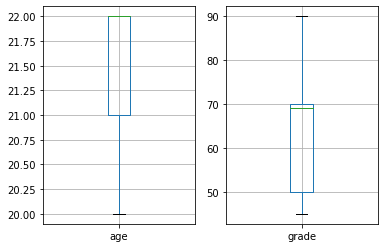

In [ ]:
plt.figure()
plt.subplot(1,2,1)
df.boxplot(column="age")
plt.subplot(1,2,2)
df.boxplot(column="grade")
plt.show()



---

---

---







#Dataset Example - 3


---




### Importing Libraries
 - Pandas for reading data file
 - Numpy for performing statistical calculations 
 - Matplotlib and seaborn for visualization 
 - Scipy.stats for Skewness and Kurtosis

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew
from scipy.stats import kurtosis

- To see all the columns which are present in the dataset

In [ ]:
pd.set_option("display.max_columns",None)#To see all the columns which are present in the dataset

### Reading dataset
- df is dataframe .
- pd.read_excel reads the excel file.
- head Function prints the first five rows of the dataset.

### Description of data
- Data belongs to student category which contains **fname** , **age** and **gender** column.
- **Fname** contins the name of students, **age** column contains the age of the students and **grade** column contains the marks obtained. 

In [ ]:
df=pd.read_excel("data1.xlsx")
df.head()

,fname,age,grade
0,Baker,14,90
1,Josephine,19,100
2,Calvin,15,66
3,Aretha,17,84
4,Britanney,19,66


### Measures of Central Tendency
- **Mean**
    - The sum of a collection of numbers divided by the count of numbers in the collection.
- **Median** 
    - The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. 
- **Mode**
    - The mode is the value that appears most often in a set of data values.

#### Where the measures of central tendency used?
- The above three values are used in handling null and outlier values in **Machine learning**, in **Image processing** mean and median plays an important role , we use mean and median for applying threshold values on the particular image.
- cv2.ADAPTIVE_THRESH_MEAN_C threshold value is the mean of neighbourhood area.
- cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. 


#### Example of median blur 

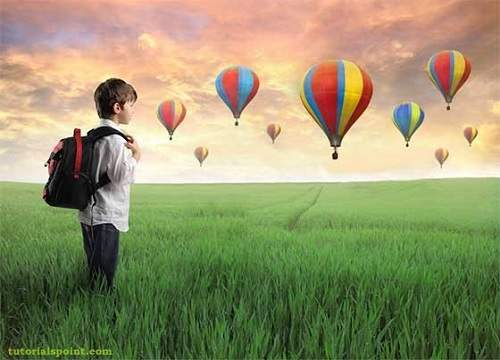
<br></br>
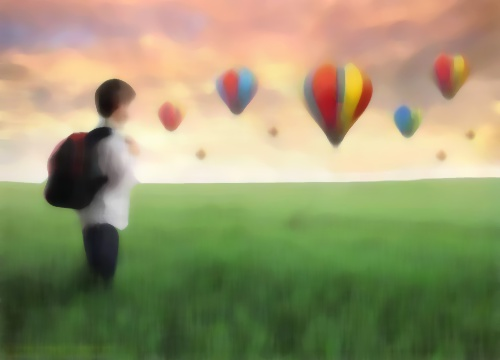

In [ ]:
df_mean=df.mean()
print("*Mean of columns age and grade*")
print(df_mean)
df_median=df.median()
print("*Median of columns age and grade*")
print(df_median)
df_mode=df.mode()
print("*Mode of columns age and grade*")
print(df_mode)

*Mean of columns age and grade*
age      16.28
grade    82.79
dtype: float64
*Median of columns age and grade*
age      16.0
grade    81.5
dtype: float64
*Mode of columns age and grade*
  fname  age  grade
0  Emma   14     69


#### Measures of Variability 
- **Standard Deviation**
    - The standard deviation is a measure of the amount of variation or dispersion of a set of values.
- **Variance**
    - The term variance refers to a statistical measurement of the spread between numbers in a data set.
- **Min and Max Variables**
    - Min is the minimum value in the column or in dataset.
    - Max is the maximum value in the column or in dataset.


#### Where the measures of variability is used?
- **Standard deviation** is used to know how data is spread so we can find some good insigths from it.
- Example:- 
    - If we are working with data which consist column of years, tax rate, sales amount etc. so, after applying standard deviation we will get to know at which year the tax rate or sales amount was more or less.
- **Min and Max** both are used to find range of the array or particilar column, so we can detect the outliers.

In [ ]:
print("Standard deviation of columns age and grade")
print(df.std())
print("Variance of columns age and grade  ")
print(df.var())
print("The Minimum value are" )
print(df.min())
print("The Maximum value are" )
print(df.max())

Standard deviation of columns age and grade
age       1.752804
grade    10.915928
dtype: float64
Variance of columns age and grade  
age        3.072323
grade    119.157475
dtype: float64
The Minimum value are
fname    Adrienne
age            14
grade          65
dtype: object
The Maximum value are
fname    Zia
age       19
grade    100
dtype: object


- **Skewness and Kurtosis**
    - **Skewness** is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
    - **Kurtosis** is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

#### Where do we use Skewness and Kurtosis ?
- **Skewness** can be used to obtain approximate probabilities and quantiles of distributions (such as value at risk in finance) via the Cornish-Fisher expansion.
- **Kurtosis** is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution . High kurtosis in a data set is an indicator that data has heavy tails or outliers.

In [ ]:
age_skew=skew(df["age"])
grade_skew=skew(df["grade"])
print("The skewness of column age is : ",age_skew)
print("The skewness of column grade is : ",grade_skew)

The skewness of column age is :  0.1891005591179678
The skewness of column grade is :  0.0923141826958847


In [ ]:
age_kurtosis=kurtosis(df["age"])
print("The kurtosis of column age is ",age_kurtosis)
grade_kurtosis=kurtosis(df["grade"])
print("The kurtosis of column grade is ",grade_kurtosis)

The kurtosis of column age is  -1.2143532529876444
The kurtosis of column grade is  -1.3309524922789433


- **Range**
    - The Range is the difference between the lowest and highest values. 
- Given that the range can easily be computed with information on the maximum and minimum value of the data set.
- Users requiring only a rough indication of the data may prefer to use this indicator over more sophisticated measures of spread. 

In [ ]:
age_range=(df["age"].max())-(df["age"].min())
print("The range of column age is :",age_range)

The range of column age is : 5


In [ ]:
grade_range=(df["grade"].max())-(df["grade"].min())
print("The range of column grade is :",grade_range)

The range of column grade is : 35


- **Percentiles/Quartiles**
    - A **percentile** is a measure at which that percentage of the total values are the same as or below that measure. For example, 90% of the data values lie below the 90th percentile, whereas 10% of the data values lie below the 10th percentile.
    - **Quartiles** are values that divide a (part of a) data table into four groups containing an approximately equal number of observations. The total of 100% is split into four equal parts: 25%, 50%, 75% and 100%.

- Percentiles are used to understand and interpret data. 
- Quartiles are used to summarize a group of numbers. 

In [ ]:
print("50th percentile of age column is:",np.percentile(df["age"],50))
print("25th percentile of age column is:",np.percentile(df["age"],25))
print("75th percentile of age column is:",np.percentile(df["age"],75))

50th percentile of age column is: 16.0
25th percentile of age column is: 15.0
75th percentile of age column is: 18.0


In [ ]:
print("50th percentile of grade column is:",np.percentile(df["grade"],50))
print("25th percentile of grade column is:",np.percentile(df["grade"],25))
print("75th percentile of grade column is:",np.percentile(df["grade"],75))

50th percentile of grade column is: 81.5
25th percentile of grade column is: 73.0
75th percentile of grade column is: 92.0


In [ ]:
print("Q2th quantile of age column is : ",np.quantile(df["age"],.50))
print("Q1th quantile of age column is : ",np.quantile(df["age"],.25))
print("Q3th quantile of age column is : ",np.quantile(df["age"],.75))

Q2th quantile of age column is :  16.0
Q1th quantile of age column is :  15.0
Q3th quantile of age column is :  18.0


In [ ]:
print("Q2 quantile of grade column is : ",np.quantile(df["grade"],.50))
print("Q1th quantile of grade column is : ",np.quantile(df["grade"],.25))
print("Q3 quantile of grade column is : ",np.quantile(df["grade"],.75))

Q2 quantile of grade column is :  81.5
Q1th quantile of grade column is :  73.0
Q3 quantile of grade column is :  92.0


- **Box Plots**
    - A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary. 
    - Lowest observation
    - Highest observation
    - Lower Quartile
    - Upper Quartile 
    - Median 

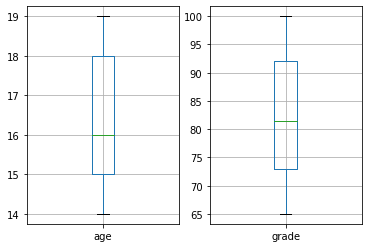

In [ ]:
plt.figure()
plt.subplot(1,2,1)
df.boxplot(column="age")
plt.subplot(1,2,2)
df.boxplot(column="grade")
plt.show()



---

---

---







#Dataset Example - 4


---




**Importing packages**

Importing packages that are needed in python to perform  statistical operations 
<br>
<br>
* numpy- 
It is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
<br>

* pandas-
pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
<br>

*   seaborn- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
<br>

*   Scipy.stats- It is a module contains a large number of probability distributions as well as a growing library of statistical functions.









In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns",None)



---







**Importing Dataset**

Mounting Google Drive locally and reading LaptopDS.csv to a dataframe then displaying its basic info using df.info()
<br>
<br>
LaptopDS.csv -

It is a dataset which contains 205 entries of latpops based on their model name and specification.This dataset has combined information of diffrent laptops so that it can be used in analysis by or can be used by customers to identify which laptops meets their requirements.

It contains 8 columns as brand(brand of the laptop), laptop_name(Model name of the laptop),display_size(Screen display size), processor_type(processor model name), graphics_card(graphic card model name), disk_space(size of disk and its type), discount_price(discounted price), price(orignal price) and ratings_5max(rating from 0 to 5).    


In [ ]:
%cd
from google.colab import drive
drive.mount('/content/gdrive')

/root
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/DS/LaptopsDS.csv')
print("Dataset On Laptop specedication based on brands : - \n",df)

Dataset On Laptop specedication based on brands : - 
       brand                       laptop_name  display_size  \
0        HP              Notebook 14-df0008nx          14.0   
1    Lenovo                IdeaPad 330S-14IKB          14.0   
2    Huawei                  MateBook D Volta          14.0   
3      Dell                  Inspiron 15 3567          15.6   
4      Asus                VivoBook 15 X510UR          15.6   
..      ...                               ...           ...   
200  Lenovo               IdeaPad 320-15IKBRN          15.6   
201  Huawei                        MateBook D          15.6   
202   Apple  MacBook Pro (Retina + Touch Bar)          15.4   
203   Apple  MacBook Pro (Retina + Touch Bar)          15.4   
204    Dell                  Inspiron 15 3576          15.6   

            processor_type                  graphics_card  \
0      Intel Celeron N4000          Intel HD Graphics 600   
1      Intel Core i5-8250U         Intel UHD Graphics 620   
2     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           205 non-null    object 
 1   laptop_name     204 non-null    object 
 2   display_size    205 non-null    float64
 3   processor_type  205 non-null    object 
 4   graphics_card   205 non-null    object 
 5   disk_space      205 non-null    object 
 6   discount_price  205 non-null    float64
 7   price           205 non-null    float64
 8   ratings_5max    205 non-null    object 
dtypes: float64(3), object(6)
memory usage: 14.5+ KB




---







 **Measures of Central Tendency**



central tendency is a central or typical value for a probability distribution. It may also be called a center or location of the distribution.
<br>
<br>


Use of central tendency statistical model- 


*   A statistical model is a mathematical model that embodies a set of statistical assumptions concerning the generation of sample data (and similar data from a larger population).
*   The central tendency is dependent on the analysis of concentration of the values of observations in an distribution.
*   In statistical sense, this statement is said to be the concentration of n items in Xi variable.
*   The study of central  are essential dimensions in understanding the distributional characteristics of a series/variable. 
*   For example, the two sets of daily rainfall for the months of April and May 2004 in Cherrapunji have same magnitude of average rainfall (a most familiar measure of central tendency) called mean while the ranges of distribution (a difference of maximum and minimum value of data –series) are different as it vary from 0 to 492.2 mm in the month of April and from 0 to 327.6mm in the month of May. 
*   It shows different degree of dispersion despite the same value of their mean. So the nature of these two distributions is different from each other showing differences in distributions.


The 3 most common measures of central tendency are the mean, median and mode.










---



**Mean**





*   It is sum of all values divided by number of values( average )
*   df.mean() Returns the mean of the values over the requested axis.
*   Using it on the data set LaptopDS.csv returned mean of all the column of numeric type in the dataset.
*   The data that are returned are showing the display_size, price and the discount price that the most of the laptops have. 







In [ ]:
print('Mean of numeric columns-\n',df.mean())

Mean of numeric columns-
 display_size        14.579805
discount_price    3812.550976
price             4040.355854
dtype: float64




---



**Trimmed Mean**



*   It is similar to mean except here we exclude the smallest and largest values in our data set.
*   Calculated by the average of all values after dropping a fixed number of extreme values. 
*   The use of a trimmed mean helps eliminate the influence of outliers or data points on the tails that may unfairly affect the traditional mean. 
*   Here we are calculating the 10 % trimmed mean of the columns display_size, price and discount.




In [ ]:
print('Trimmed Mean of the column display_size = ',stats.trim_mean(df['display_size'],0.1))
print('Trimmed Mean of the column price = ',stats.trim_mean(df['price'],0.1))
print('Trimmed Mean of the column discount_price = ',stats.trim_mean(df['discount_price'],0.1))

Trimmed Mean of the column display_size =  14.584606060606058
Trimmed Mean of the column price =  3756.7454545454543
Trimmed Mean of the column discount_price =  3508.018181818182




---



**Weighted Mean**

* It is similar to mean except weights are used to balance the observation
* calculated by the sum of all values times a weight divided by the sum of the weights.
*   It is used when we consider some data values to be more important than other values and so we want them to contribute more to the final "average". 
* np.average() is used to Compute the weighted average along the specified axis.
*    Here we are calculating the Weightedmean where weights are shifted by 10 of the columns display_size, price and discount.




In [ ]:
weights=[i for i in range(10,215)]
print('Weighted Mean of the column display_size = ',np.average(df['display_size'],weights=weights))
print('Weighted Mean of the column price = ',np.average(df['price'],weights=weights))
print('Weighted Mean of the column discount_price = ',np.average(df['discount_price'],weights=weights))

Weighted Mean of the column display_size =  14.676464285714285
Weighted Mean of the column price =  4115.339146341464
Weighted Mean of the column discount_price =  3975.319111498258




---



**Median**


*   It is the value such that one-half of the data lies above and below. 
*   df.median() Return the median of the values over the requested axis.
*   Using it on the data set LaptopDS.csv returned median of all the column of numeric type in the dataset 
*   The data that are returned are showing  middle values of column the display_size, price and the discount price. 



In [ ]:
print('Median of numeric columns-\n',df.median())

Median of column display_size =  14.0
Median of column discount_price =  3149.0
Median of column price =  3299.0




---



**Mode**

*   It is the value that frequenty occurs.
*   df.mode() Returns The mode of a set of values is the value that appears most often. It can have multiple values.


In [ ]:
for i in df.columns:
  print("\nMode of column "+i+" -\n",df[i].mode())


Mode of column brand -
 0    HP
dtype: object

Mode of column laptop_name -
 0    MacBook Pro (Retina + Touch Bar)
dtype: object

Mode of column display_size -
 0    15.6
dtype: float64

Mode of column processor_type -
 0     Intel Core i5-8250U
dtype: object

Mode of column graphics_card -
 0     NVIDIA GeForce MX150 (2 GB)
dtype: object

Mode of column disk_space -
 0     1 TB HDD
dtype: object

Mode of column discount_price -
 0    2299.0
1    3599.0
dtype: float64

Mode of column price -
 0    3149.0
dtype: float64

Mode of column ratings_5max -
 0    0 / 5
dtype: object



---


**Measures of Variability**

*  A measure of variability is a summary statistic that represents the amount of dispersion in a dataset i.e How spread out are the values.
* Analysts frequently use the mean to summarize the center of a population or a process. 
* When a distribution has lower variability, the values in a dataset are more consistent. 
*However, when the variability is higher, the data points are more dissimilar and extreme values become more likely. 
* Consequently, understanding variability helps us grasp the likelihood of unusual events.
* following are the most common Measure of variablity 




---



**Standard Deviation**

*   A standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance.
*   Standard deviation is an especially useful tool in investing and trading strategies as it helps measure market and security volatility and predict performance trends. 
* As it relates to investing, for example, an index fund is likely to have a low standard deviation versus its benchmark index, as the fund's goal is to replicate the index.
* df.std() Return sample standard deviation over requested axis.


In [ ]:
print('standard deviation of numeric columns - \n',df.std())

standard deviation of numeric columns - 
 display_size         1.109458
discount_price    2308.702005
price             2327.147396
dtype: float64




---



**Variance**

*  The term variance refers to a statistical measurement of the spread between numbers in a data set. 
*  More specifically, variance measures how far each number in the set is from the mean and thus from every other number in the set.
*  Statisticians use variance to see how individual numbers relate to each other within a data set, rather than using broader mathematical techniques such as arranging numbers into quartiles. 
* The advantage of variance is that it treats all deviations from the mean the same regardless of their direction. 
* The squared deviations cannot sum to zero and give the appearance of no variability at all in the data. 
* One drawback to variance, though, is that it gives added weight to outliers. These are the numbers that are far from the mean.  
* df.var() Return unbiased variance over requested axis.

In [ ]:
print('variance of numeric columns - \n',df.var())

variance of numeric columns - 
 display_size      1.230898e+00
discount_price    5.330105e+06
price             5.415615e+06
dtype: float64




---



**Min and Max Variables**


* df.min() Returns the minimum of the values over the requested axis.
* df.max() Returns the maximum of the values over the requested axis.
* Using it in LaptopDS.csv returns minimum and maximum values of all columns.

In [ ]:
print('\nMin variables of all columns -\n',df.min())
print('\nMax variables of all columns -\n ',df.max())


Min variables of numeric columns -
 brand                               Acer
display_size                          12
processor_type               AMD A9-9425
graphics_card      AMD Radeon 520 (2 GB)
disk_space                      1 TB HDD
discount_price                       899
price                                999
ratings_5max                       0 / 5
dtype: object

Max variables of numeric columns -
  brand                                 Microsoft
display_size                               18.4
processor_type                    Intel Core i9
graphics_card      Radeon Pro 560X GDDR5 (4 GB)
disk_space          8 GB (Cache Flash)/1 TB HDD
discount_price                            12499
price                                     12499
ratings_5max                            5.0 / 5
dtype: object




---



**Skewness**

* In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
* The skewness value can be positive, zero, negative, or undefined.
* For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. 
* df.skew() return unbiased skew over requested axis.

In [ ]:
print('Skewness of numeric columns - \n',df.skew())

Skewness of numeric columns - 
 display_size      0.178277
discount_price    1.239832
price             1.163004
dtype: float64




---



**Kurtosis**

* In probability theory and statistics, kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.
* Like skewness, kurtosis describes the shape of a probability distribution and there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.
* df.kurtosis() Returns unbiased kurtosis over requested axis.
* df.kurtosis() computes the Fisher's Kurtosis which is obtained by subtracting the Pearson's Kurtosis by three. With Fisher's Kurtosis, definition a normal distribution has a kurtosis of 0.

In [ ]:
print('kurtosis of numeric columns - \n',df.kurtosis())

kurtosis of numeric columns - 
 display_size     -0.650084
discount_price    1.377946
price             1.279941
dtype: float64




---



**Range**

*    Range is the difference between the lowest and highest values.
*   It is calculated by max-min value of a column.
* It is a good way to get a very basic understanding of how spread out numbers in the data set really are because it is easy to calculate as it only requires a basic arithmetic operation, but there are also a few other applications of the range of a data set in statistics.



In [ ]:
print('Range of the column display_size = ',df['display_size'].max()-df['display_size'].min())
print('Range of the column price = ',df['price'].max()-df['price'].min())
print('Range of the column discount_price = ',df['discount_price'].max()-df['discount_price'].min())

Range of the column display_size =  6.399999999999999
Range of the column price =  11500.0
Range of the column discount_price =  11600.0




---



**Percentile**

* percentile is a term used in statistics to express how a score compares to other scores in the same set. 
* While there is technically no standard definition of percentile, it's typically communicated as the percentage of values that fall below a particular value in a set of data scores.
* In statistics, a percentile is a score below which a given percentage of scores in its frequency distribution fall or a score at or below which a given percentage fall.
*  For example, the 50th percentile (the median) is the score below which 50% (exclusive) or at or below which (inclusive) 50% of the scores in the distribution may be found.
* np.percentile() Returns the q-th percentile(s) of the array elements.

In [ ]:
print("\nPercentile summary-")
print('\n\n10th Percentile of the column display_size = ',np.percentile(df['display_size'],10))
print('50th Percentile(medain) of the display_size = ',np.percentile(df['display_size'],50))
print('90th Percentile of the column display_size = ',np.percentile(df['display_size'],90))
print('\n\n10th Percentile of the column price = ',np.percentile(df['price'],10))
print('50th Percentile(medain) of the column price = ',np.percentile(df['price'],50))
print('90th Percentile of the column price = ',np.percentile(df['price'],90))
print('\n\n10th Percentile of the column discount_price = ',np.percentile(df['discount_price'],10))
print('50th Percentile(medain) of the column discount_price = ',np.percentile(df['discount_price'],50))
print('90th Percentile of the column discount_price = ',np.percentile(df['discount_price'],90))


Percentile summary-


10th Percentile of the column display_size =  13.3
50th Percentile(medain) of the display_size =  14.0
90th Percentile of the column display_size =  15.599999999999998


10th Percentile of the column price =  1719.0
50th Percentile(medain) of the column price =  3299.0
90th Percentile of the column price =  6999.0


10th Percentile of the column discount_price =  1499.0
50th Percentile(medain) of the column discount_price =  3149.0
90th Percentile of the column discount_price =  6910.999999999999




---



**Quertiles**

*   In statistics, a quartile is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size. 
* The data must be ordered from smallest to largest to compute quartiles
*  The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
* The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
* The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.
* df.quantile() Returns values at the given quantile over requested axis.



In [ ]:
print("\nQuertile summary-")
print("\n25% quertile (Lower quertile) of numeric columns-\n ",df.quantile(q=0.25))
print("\n50% quertile (Middle quertile)of numeric columns-\n",df.quantile(q=0.5))
print("\n75% quertile (Upper quertile) of numeric columns-\n",df.quantile(q=0.75))


Quertile summary-

25% quertile (Lower quertile) of numeric columns-
  display_size        13.3
discount_price    2099.0
price             2249.0
Name: 0.25, dtype: float64

50% quertile (Middle quertile)of numeric columns-
 display_size        14.0
discount_price    3149.0
price             3299.0
Name: 0.5, dtype: float64

75% quertile (Upper quertile) of numeric columns-
 display_size        15.6
discount_price    4939.0
price             5649.0
Name: 0.75, dtype: float64




---



**Boxplot**



* A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
* Diffrent parts of boxplot are-
*   median (Q2/50th Percentile): the middle value of the dataset.
* first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
* interquartile range (IQR): 25th to the 75th percentile.
* “maximum”: Q3 + 1.5*IQR
* “minimum”: Q1 -1.5*IQR
* whiskers ( the two lines outside the box that extend to the highest and lowest observations.)
* outliers (shown as black diamond)
*  sns.boxplot() Draws a box plot to show distributions with respect to categories.
* The below boxplot shows us that there are some outliers in discount_price and price columns





Boxplot for all numeric columns-




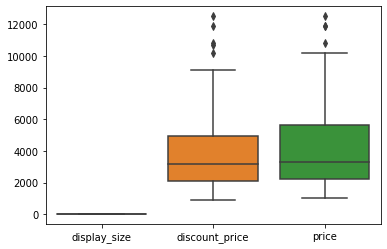

In [ ]:
print("Boxplot for all numeric columns-\n\n")
sns.boxplot(data=df)

Boxplot for column display_size-




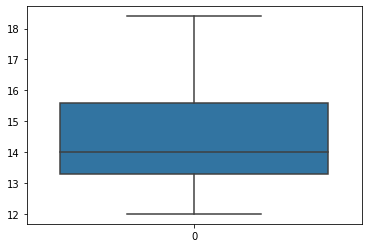

In [ ]:
print("Boxplot for column display_size-\n\n")
sns.boxplot(data=df['display_size'])



---

---

---







#Dataset Example - 5


---




**Importing packages**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
pd.set_option("display.max_columns",None)

**Importing Dataset**

In [ ]:
%cd
from google.colab import drive
drive.mount('/content/gdrive')

/root
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/gdrive/MyDrive/DS/iris.xlsx')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,Iris-virginica
142,6.3,2.5,5.0,1.9,Iris-virginica
143,6.5,3.0,5.2,2.0,Iris-virginica
144,6.2,3.4,5.4,2.3,Iris-virginica


 **Measures of Central Tendency**



**Mean**




In [ ]:
print('Mean of numeric columns-\n',df.mean())

Mean of numeric columns-
 SepalLength    5.790411
SepalWidth     3.019863
PetalLength    3.734390
PetalWidth     1.186986
dtype: float64


**Trimmed Mean**

In [ ]:
print('Trimmed Mean of the column SepalLength = ',stats.trim_mean(df['SepalLength'],0.1))
print('Trimmed Mean of the column SepalWidth = ',stats.trim_mean(df['SepalWidth'],0.1))
print('Trimmed Mean of the column PetalLength = ',stats.trim_mean(df['PetalLength'],0.1))
print('Trimmed Mean of the column PetalWidth = ',stats.trim_mean(df['PetalWidth'],0.1))

Trimmed Mean of the column SepalLength =  5.786440677966102
Trimmed Mean of the column SepalWidth =  3.020338983050847
Trimmed Mean of the column PetalLength =  3.741703389830509
Trimmed Mean of the column PetalWidth =  1.1737288135593218


**Weighted Mean**

In [ ]:
weights=[i for i in range(10,156)]
print('Weighted Mean of the column SepalLength = ',np.average(df['SepalLength'],weights=weights))
print('Weighted Mean of the column SepalWidth = ',np.average(df['SepalWidth'],weights=weights))
print('Weighted Mean of the column PetalLength = ',np.average(df['PetalLength'],weights=weights))
print('Weighted Mean of the column PetalWidth = ',np.average(df['PetalWidth'],weights=weights))

Weighted Mean of the column SepalLength =  6.122681610626816
Weighted Mean of the column SepalWidth =  2.9513408053134076
Weighted Mean of the column PetalLength =  4.533803652968037
Weighted Mean of the column PetalWidth =  1.5370029057700292


**Median**

In [ ]:
print('Median of numeric columns-\n',df.median())

Median of numeric columns-
 SepalLength    5.8
SepalWidth     3.0
PetalLength    4.3
PetalWidth     1.3
dtype: float64


**Mode**

In [ ]:
for i in df.columns:
  print("\nMode of column "+i+" -\n",df[i].mode())


Mode of column SepalLength -
 0    5.0
1    5.1
2    6.3
dtype: float64

Mode of column SepalWidth -
 0    3.0
dtype: float64

Mode of column PetalLength -
 0    1.5
dtype: float64

Mode of column PetalWidth -
 0    0.2
dtype: float64

Mode of column species -
 0    Iris-setosa
dtype: object


**Measures of Variability**

**Standard Deviation**

In [ ]:
print("Standard deviation of columns SepalLength, SepalWidth, PetalLength and PetalWidth ")
print(df.std())

Standard deviation of columns SepalLength, SepalWidth, PetalLength and PetalWidth 
SepalLength    0.951900
SepalWidth     0.498635
PetalLength    1.777466
PetalWidth     0.761963
dtype: float64


**Variance**

In [ ]:
print("Variance of columns SepalLength, SepalWidth, PetalLength and PetalWidth  ")
print(df.var())

Variance of columns SepalLength, SepalWidth, PetalLength and PetalWidth  
SepalLength    0.906114
SepalWidth     0.248637
PetalLength    3.159386
PetalWidth     0.580588
dtype: float64


**Min and Max Variables**


In [ ]:
print("The Minimum value are" )
print(df.min())
print("The Maximum value are" )
print(df.max())

The Minimum value are
SepalLength                  0
SepalWidth                   0
PetalLength                  0
PetalWidth                   0
species        IRIS-VERSICOLOR
dtype: object
The Maximum value are
SepalLength       7.9
SepalWidth        4.4
PetalLength       6.9
PetalWidth        2.5
species        setosa
dtype: object


**Skewness**

In [ ]:
SepalLength_skew=skew(df["SepalLength"])
SepalWidth_skew=skew(df["SepalWidth"])
PetalLength_skew=skew(df["PetalLength"])
PetalWidth_skew=skew(df["PetalWidth"])
print("The skewness of column SepalLength is : ",SepalLength_skew)
print("The skewness of column SepalWidth is : ",SepalWidth_skew)
print("The skewness of column PetalLength is : ",PetalLength_skew)
print("The skewness of column PetalWidth is : ",PetalWidth_skew)

The skewness of column SepalLength is :  -1.2515477210397683
The skewness of column SepalWidth is :  -1.2041348306576325
The skewness of column PetalLength is :  -0.2827664375692608
The skewness of column PetalWidth is :  -0.10721755066546522


**Kurtosis**

In [ ]:
SepalLength_kurtosis=kurtosis(df["SepalLength"])
SepalWidth_kurtosis=kurtosis(df["SepalWidth"])
PetalLength_kurtosis=kurtosis(df["PetalLength"])
PetalWidth_kurtosis=kurtosis(df["PetalWidth"])
print("The kurtosis of column SepalLength is : ",SepalLength_kurtosis)
print("The kurtosis of column SepalWidth is : ",SepalWidth_kurtosis)
print("The kurtosis of column PetalLength is : ",PetalLength_kurtosis)
print("The kurtosis of column PetalWidth is : ",PetalWidth_kurtosis)

The kurtosis of column SepalLength is :  7.940546956976549
The kurtosis of column SepalWidth is :  8.248987661959049
The kurtosis of column PetalLength is :  -1.3471178620291377
The kurtosis of column PetalWidth is :  -1.3401951626371529


**Range**

In [ ]:
SepalLength_range=(df["SepalLength"].max())-(df["SepalLength"].min())
print("The range of column SepalLength is :",SepalLength_range)

The range of column SepalLength is : 7.9


In [ ]:
SepalWidth_range=(df["SepalWidth"].max())-(df["SepalWidth"].min())
print("The range of column SepalWidth is :",SepalWidth_range)

The range of column SepalWidth is : 4.4


In [ ]:
PetalLength_range=(df["PetalLength"].max())-(df["PetalLength"].min())
print("The range of column PetalLength is :",PetalLength_range)

The range of column PetalLength is : 6.9


In [ ]:
PetalWidth_range=(df["PetalWidth"].max())-(df["PetalWidth"].min())
print("The range of column PetalWidth is :",PetalWidth_range)

The range of column PetalWidth is : 2.5


**Quertiles and Percentiles**

In [ ]:
des_r = df.describe()
des_r

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,146.000000,146.000000,146.000000,146.000000
mean,5.790411,3.019863,3.734390,1.186986
std,0.951900,0.498635,1.777466,0.761963
min,0.000000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Boxplot**

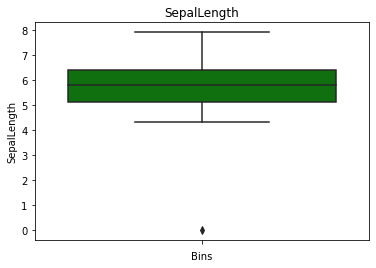

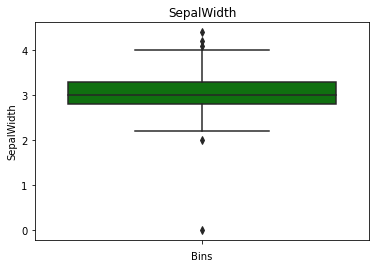

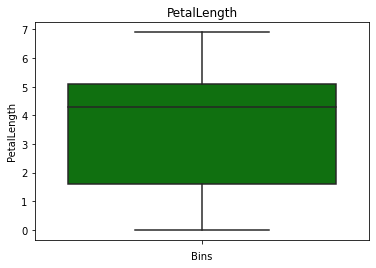

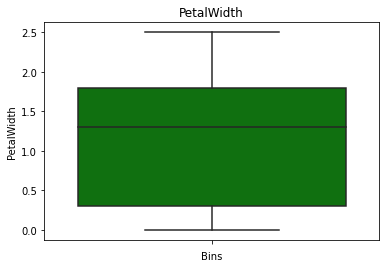

In [ ]:
# plotting boxplots
colNames = df.columns.tolist() # make a list of columns present in dataframes
for colName in colNames:
    if df[colName].dtype == "object" or colName == 'id': # skip Id and string columns
        continue
    plt.figure()
    sns.boxplot(y=df[colName], color='g') # plot the boxplot
    plt.title(colName) # provide title
    plt.ylabel(colName) # name Y axis
    plt.xlabel('Bins') # name X axis
    plt.show()